In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt
import analysis_utils as au
import importlib

In [193]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [1, 5, 6, 13, 18, 25]
PSDs = []
fit_l = []
fitted_l = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    if file == 13:
        fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 50000, 10000, 2*10**(10), 132000, 10000, 5.0*10**(-9)])
        fitted = au.triple_Linewidth2(PSD_freq, *fit)
    elif file == 25:
        lb = int(10000*nps_frac)
        ub = int(300000*nps_frac)
        fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 120000, 10000, 2*10**(10), 150000, 10000, 7.0*10**(-9)])
        fitted = au.triple_Linewidth2(PSD_freq, *fit)
    else:
        fit, cov = opt.curve_fit(au.double_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000, 10**11, 170000, 10000, 5*10**(-9)])
        fitted = au.double_Linewidth2(PSD[0], *fit)
        fit = np.concatenate((fit, np.zeros(3)))
    fit_l.append(fit)
    fitted_l.append(fitted)
PSD_freq = PSD[0]

In [194]:
fit_l

[array([2.31644257e+11, 3.81110467e+04, 2.95175580e+04, 2.24008098e+11,
        1.68699613e+05, 3.44400760e+04, 4.65914490e-09, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([4.32165167e+11, 3.99372495e+04, 2.34662873e+04, 3.28035385e+11,
        1.63314319e+05, 2.51588635e+04, 3.97277358e-09, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([ 3.71613302e+11,  3.92917776e+04,  2.68023403e+04,  3.06128904e+11,
         1.66608164e+05, -2.97128324e+04,  4.16585000e-09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 array([9.29426138e+10, 2.13800590e+04, 1.81322135e+04, 3.06534929e+09,
        5.10609999e+04, 1.58997892e+04, 2.23629725e+10, 1.29874302e+05,
        3.99110652e+04, 5.16510370e-09]),
 array([3.25160999e+11, 3.86936177e+04, 3.21100191e+04, 2.90968031e+11,
        1.70248136e+05, 3.67680951e+04, 4.45848290e-09, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([ 3.11975333e+11,  2.84491922e+04,  1.66828412e+04,  

In [198]:
np.transpose(fit_l)[8]

array([     0.        ,      0.        ,      0.        ,  39911.06515052,
            0.        , -23298.11889843])

(0.0, 300000.0)

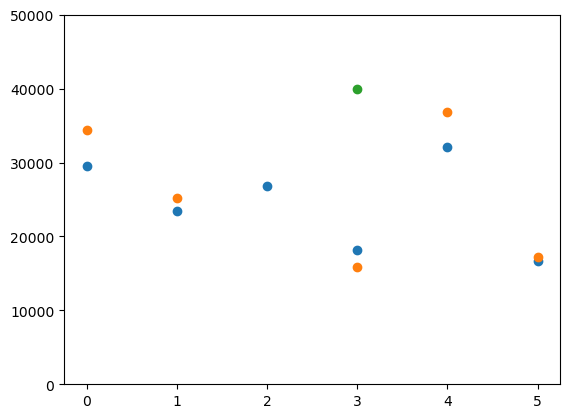

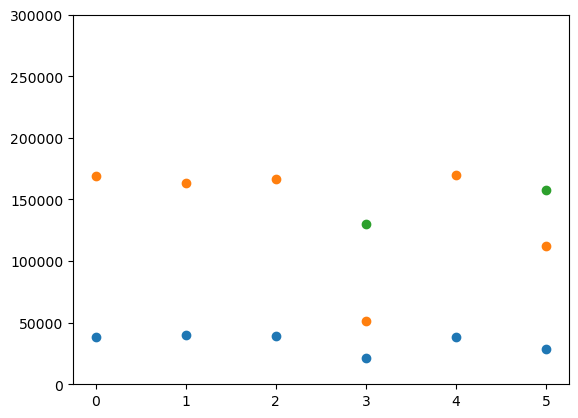

In [199]:
plt.plot(np.transpose(fit_l)[2], 'o')
plt.plot(np.transpose(fit_l)[5], 'o')
plt.plot([3, 5], [np.transpose(fit_l)[8][3], np.transpose(fit_l)[8][5]], 'o')
plt.ylim(0, 50000)
plt.figure()
plt.plot(np.transpose(fit_l)[1], 'o')
plt.plot(abs(np.transpose(fit_l)[4]), 'o')
plt.plot([3, 5], [np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]], 'o')
plt.ylim(0, 300000)

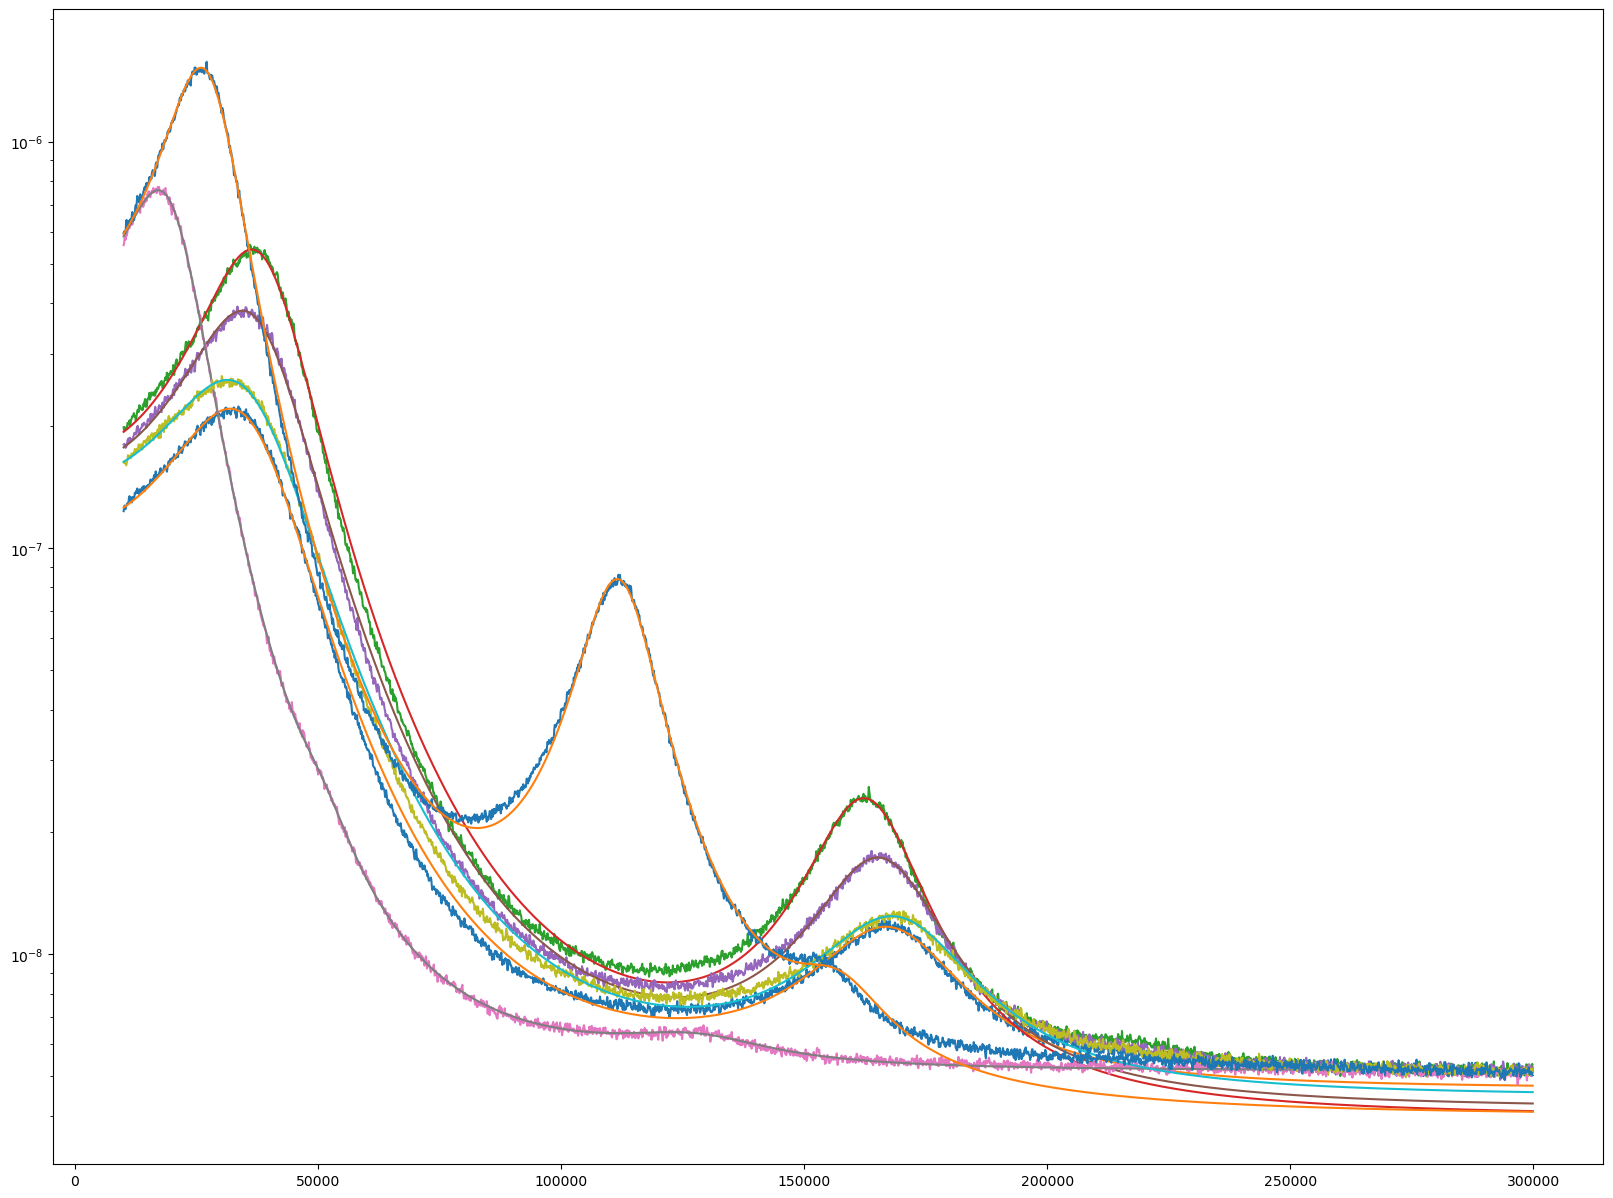

In [197]:
plt.figure(figsize = (20, 15))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
    plt.plot(PSD_freq[lb:ub], fitted_l[n][lb:ub])
plt.yscale('log')

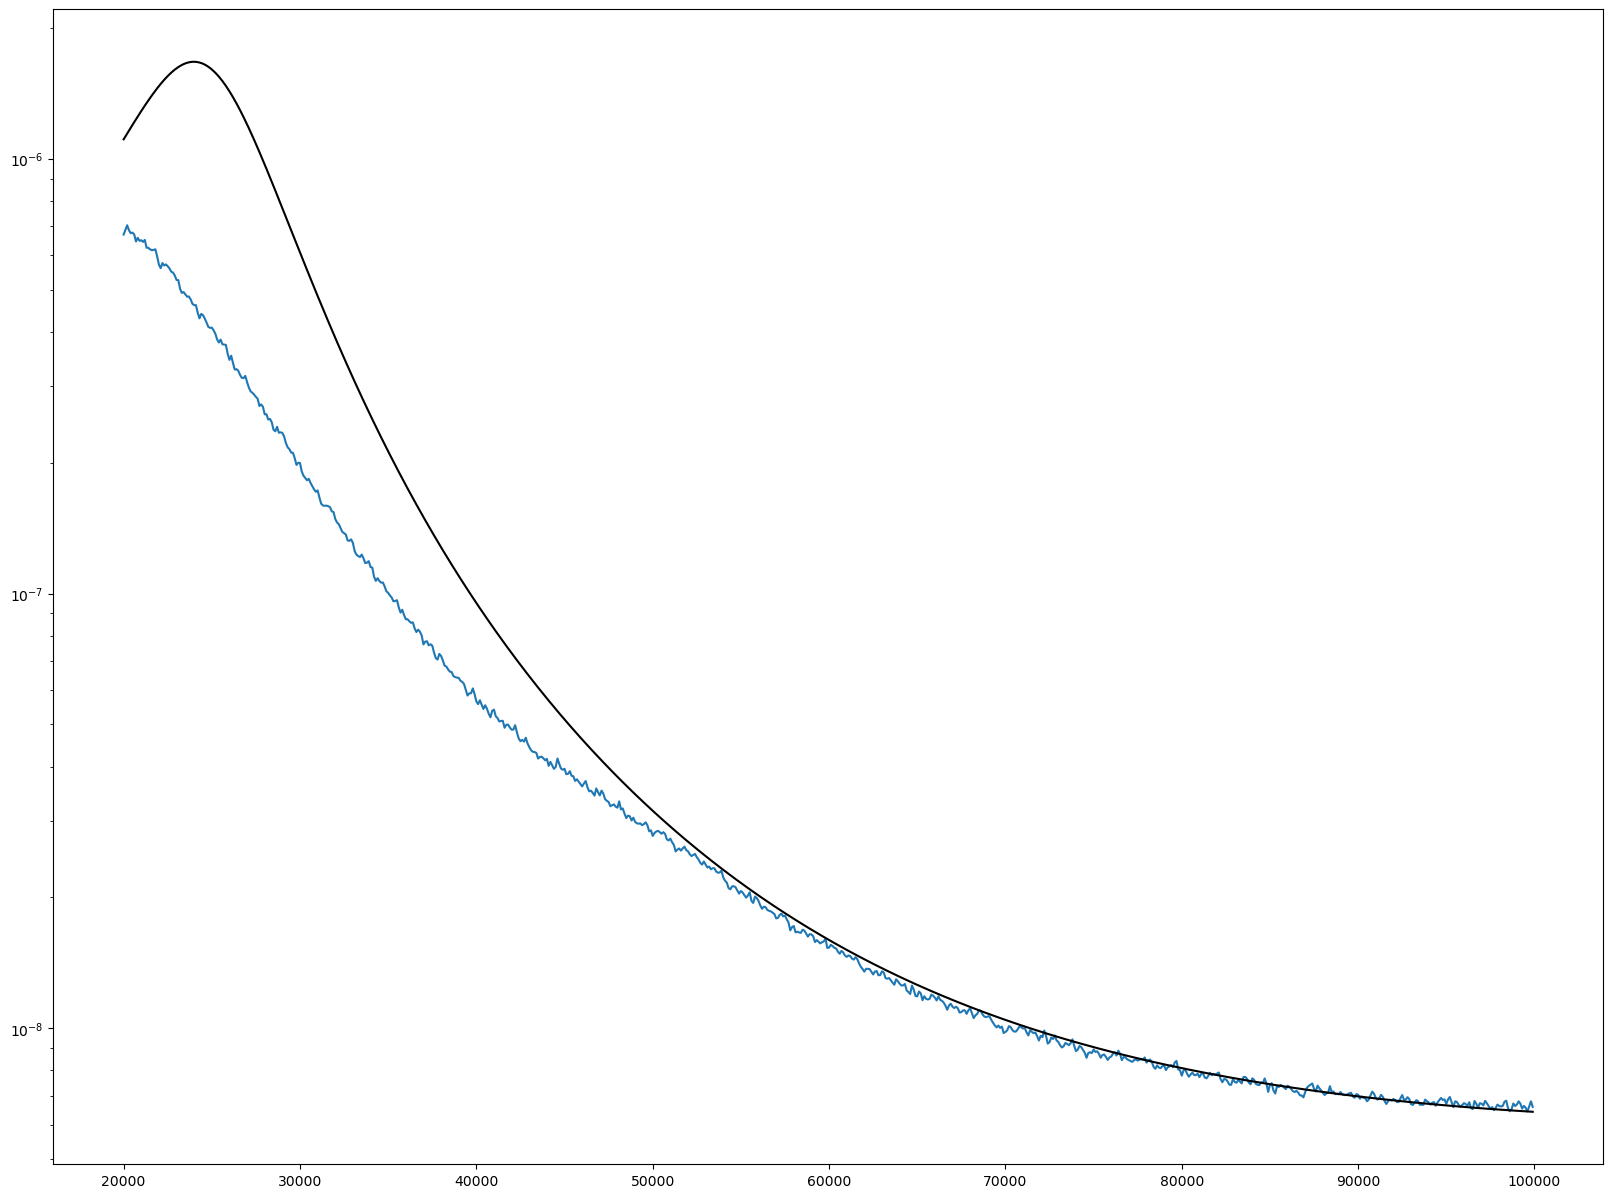

In [125]:
plt.figure(figsize = (20, 15))
lb = int(20000*nps_frac)
ub = int(100000*nps_frac)
test = au.double_Linewidth2(PSD_freq, 10**11, 25000, 10000, 2*10**(10), 132000, 35000, 5.0*10**(-9))
plt.plot(PSD_freq[lb:ub], PSDs[3][lb:ub])
plt.plot(PSD_freq[lb:ub], test[lb:ub], 'k')
plt.yscale('log')

In [190]:
importlib.reload(au)
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD_freq[lb:ub], PSDs[5][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 120000, 10000, 2*10**(10), 150000, 10000, 7.0*10**(-9)])
fitted = au.triple_Linewidth2(PSD_freq, *fit)
print(fit)

[ 3.11975333e+11  2.84491922e+04  1.66828412e+04  2.87810455e+11
  1.12235636e+05  1.72363279e+04  3.65730308e+10  1.57488705e+05
 -2.32981189e+04  3.99819031e-09]


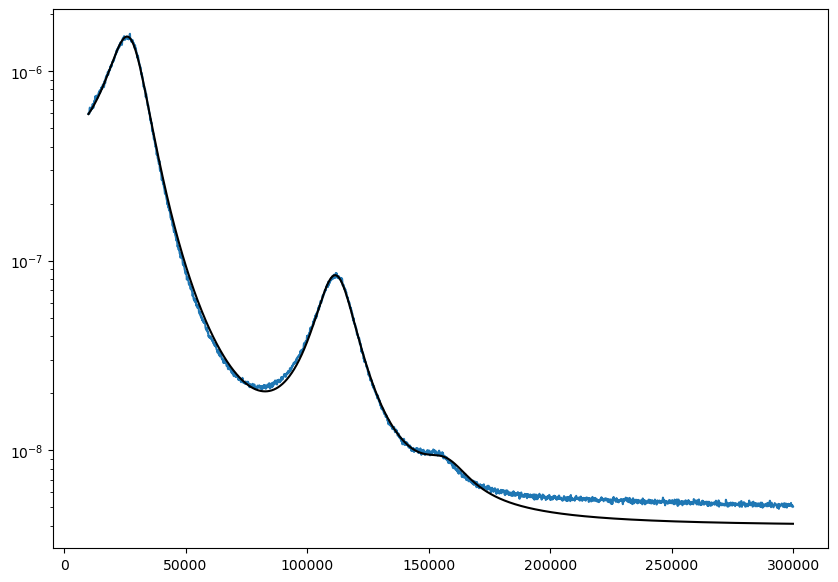

In [191]:
plt.figure(figsize = (10, 7))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
plt.plot(PSD_freq[lb:ub], PSDs[5][lb:ub])
plt.plot(PSD_freq[lb:ub], fitted[lb:ub], 'k')
plt.yscale('log')

In [19]:
eps = 1.45
rho = 2200
print(np.sqrt((eps-1)/(eps+2)/rho))
eps = 33
rho = 1000
print(np.sqrt((eps-1)/(eps+2)/rho))
eps = 5.7
rho = 4000
print(np.sqrt((eps-1)/(eps+2)/rho))

0.00769990503509018
0.030237157840738178
0.012353032121604907


In [40]:
filename = 'D:/Lab Data/diamond/240520/'
files = [8, 9, 10, 11, 12, 13, 14, 15, 16]
PSDs = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

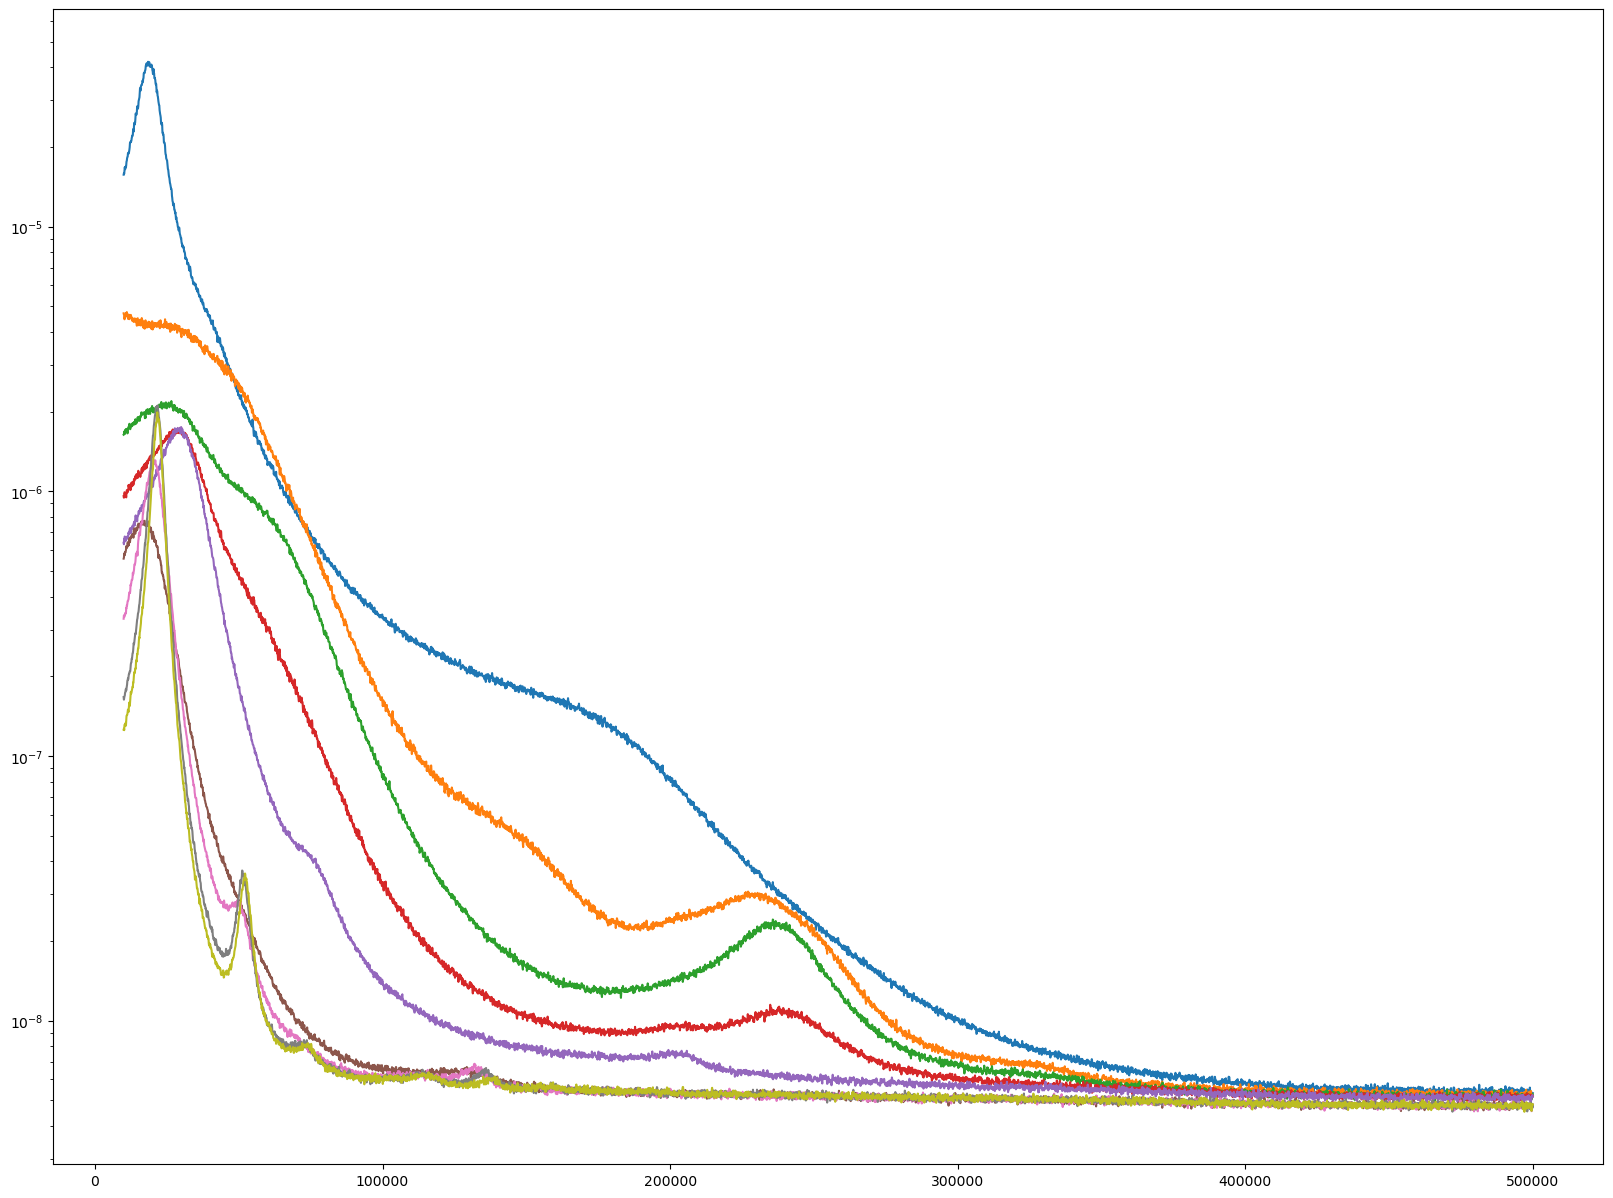

In [42]:
plt.figure(figsize = (20, 15))
lb = int(10000*nps_frac)
ub = int(500000*nps_frac)
for PSD in PSDs:
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [32]:
filename = 'D:/Lab Data/diamond/240520/'
files = [1, 2, 3]
PSDs = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

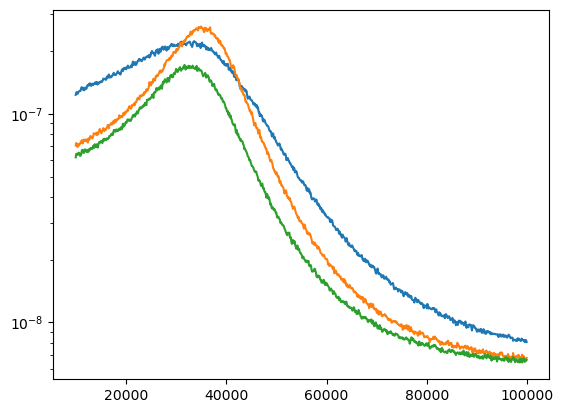

In [33]:
plt.figure()
lb = int(10000*nps_frac)
ub = int(100000*nps_frac)
for PSD in PSDs:
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [24]:
filename = 'D:/Lab Data/diamond/240520/'
files = [4, 5]
PSDs = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 1
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

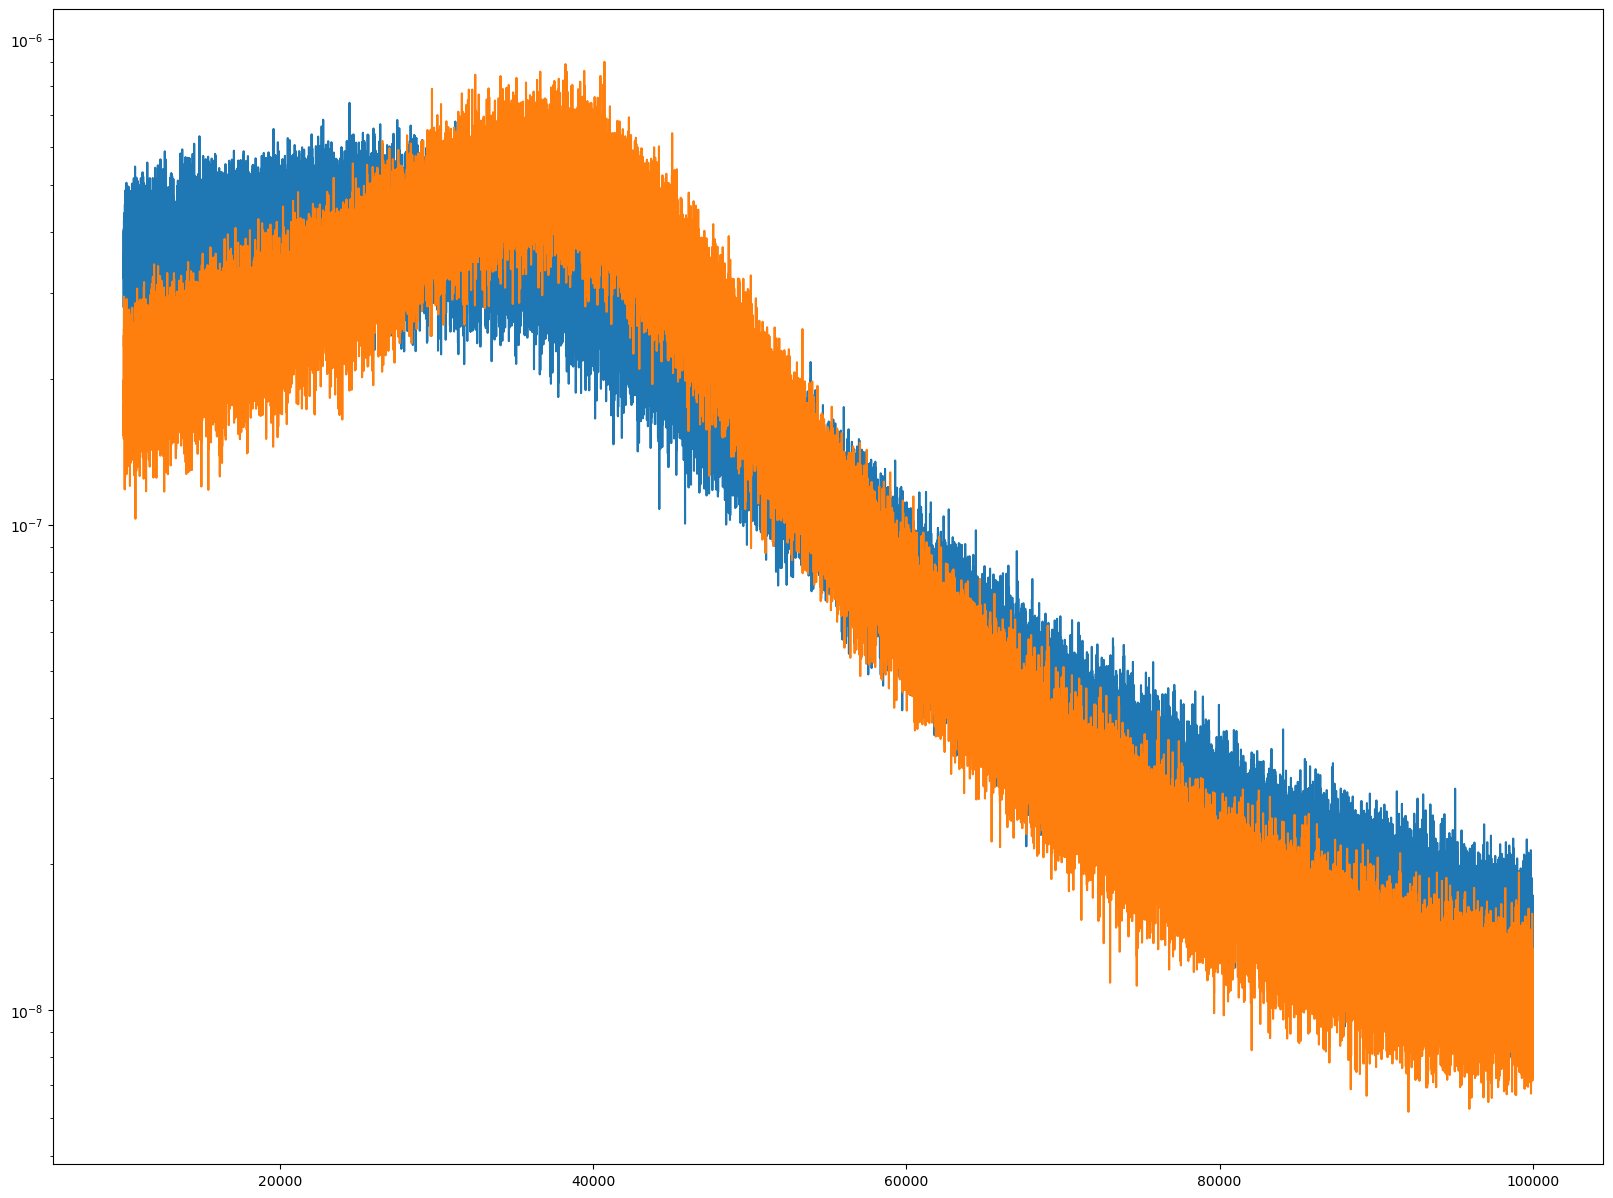

In [25]:
plt.figure(figsize = (20, 15))
lb = 10000
ub = 100000
for PSD in PSDs:
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [26]:
filename = 'D:/Lab Data/diamond/240520/'
files = [6, 7]
PSDs = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 1
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

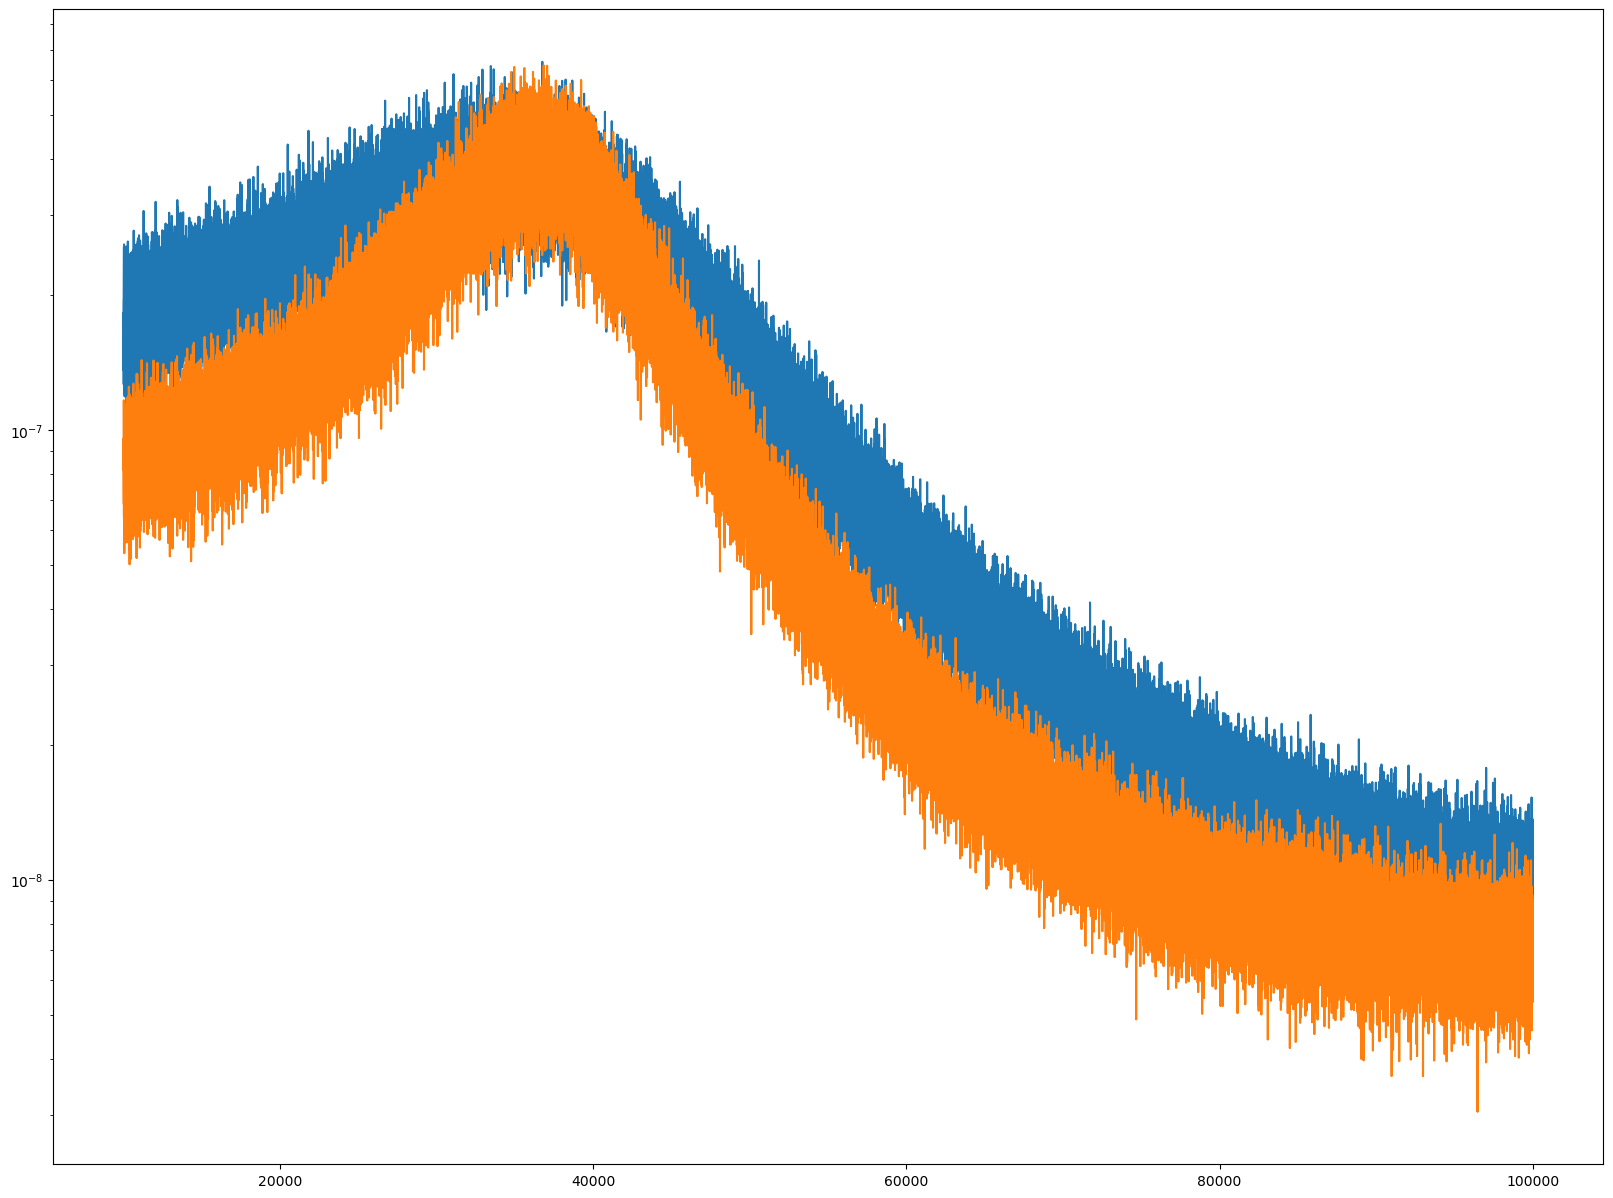

In [27]:
plt.figure(figsize = (20, 15))
lb = 10000
ub = 100000
for PSD in PSDs:
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [28]:
filename = 'D:/Lab Data/diamond/240520/'
files = [17, 18]
PSDs = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 1
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

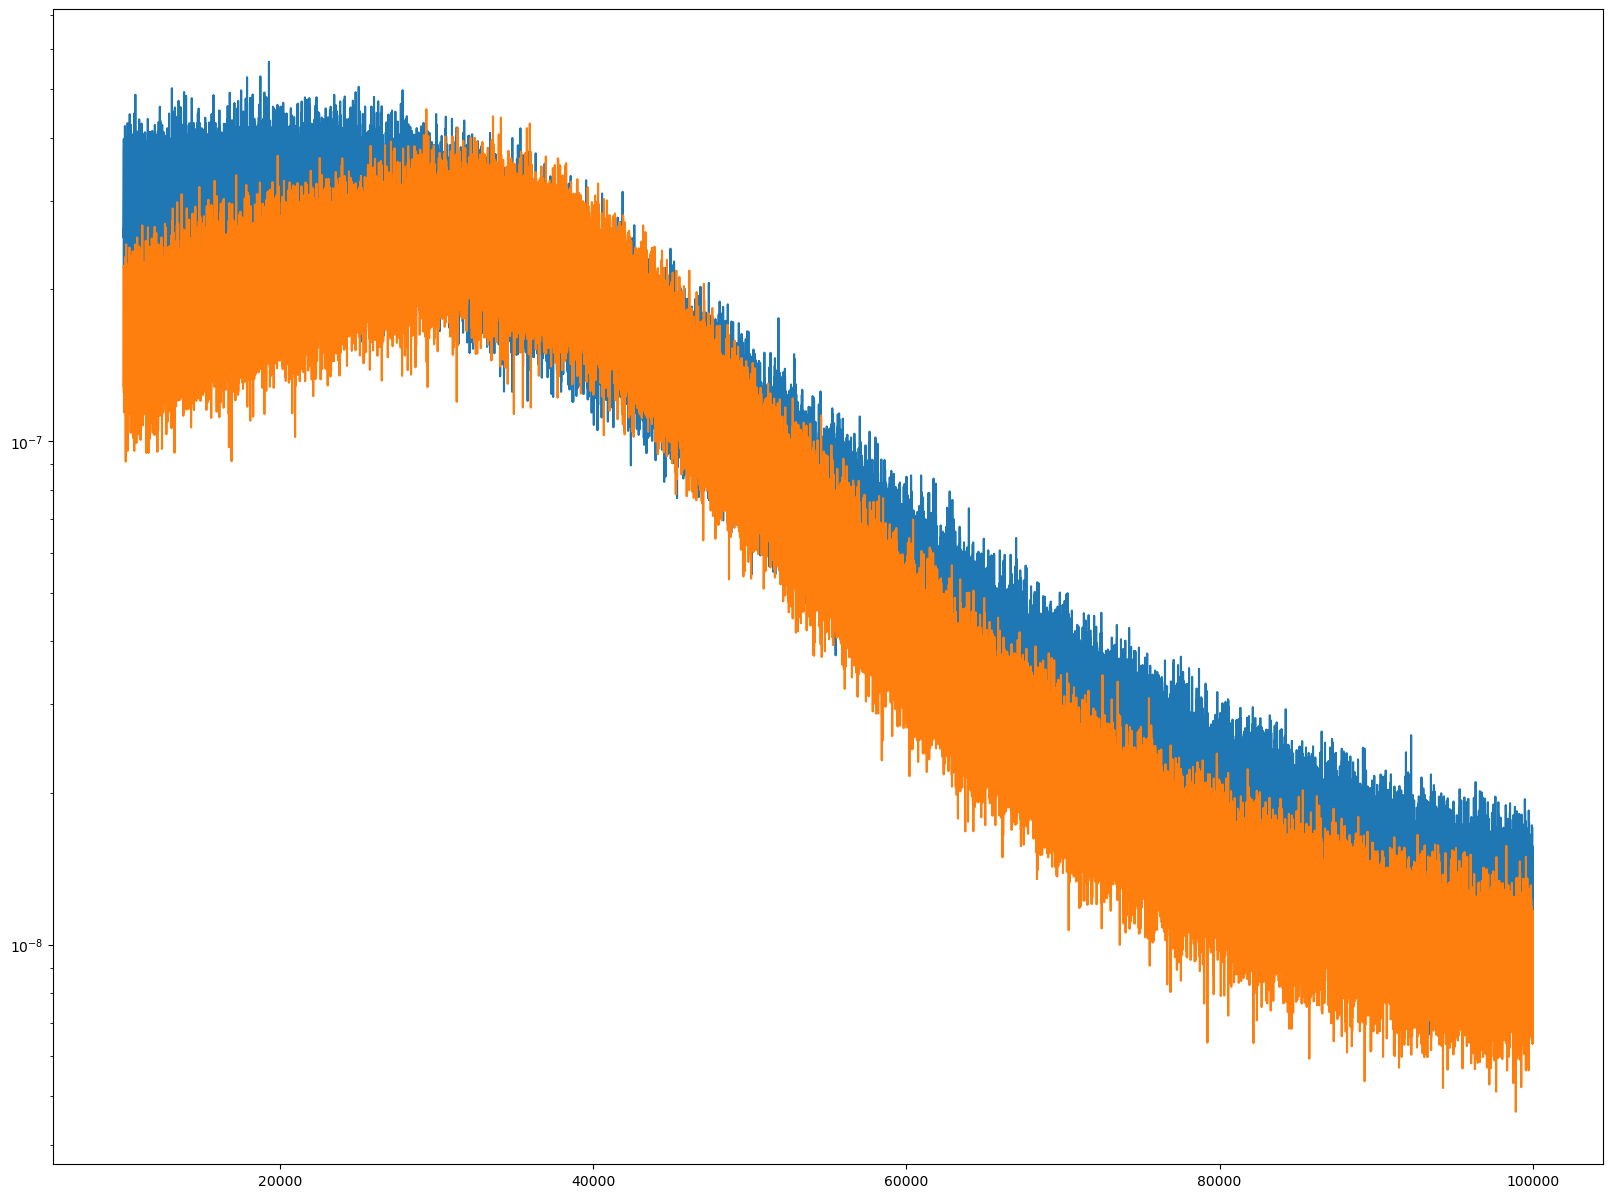

In [29]:
plt.figure(figsize = (20, 15))
lb = 10000
ub = 100000
for PSD in PSDs:
    plt.plot(PSD_freq[lb:ub], PSD[lb:ub])
plt.yscale('log')